In [1]:
import pandas as pd


In [2]:
all_dfs = pd.read_excel('output.xlsx', sheet_name=None)

In [3]:
all_dfs.keys()

dict_keys(['orders', 'order_items', 'customers', 'payments', 'products'])

In [4]:
df1 = all_dfs['orders']
df1.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [5]:
df1 = df1[df1["order_status"] == "delivered"]

In [6]:
percent = round(df1.isnull().sum() * 100 / len(df1),2)
percent

Unnamed: 0                       0.0
order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_timestamp        0.0
order_estimated_delivery_date    0.0
dtype: float64

In [7]:
sum(df1.duplicated(subset="order_id")) == 0

True

In [8]:
df1 = df1.dropna()

In [9]:
percent = round(df1.isnull().sum() * 100 / len(df1),2)
percent

Unnamed: 0                       0.0
order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_timestamp        0.0
order_estimated_delivery_date    0.0
dtype: float64

In [10]:
df2 = all_dfs['order_items']
df2.head()


,Unnamed: 0,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [11]:
percent = round(df2.isnull().sum() * 100 / len(df2),2)
percent

Unnamed: 0          0.0
order_id            0.0
order_item_id       0.0
product_id          0.0
seller_id           0.0
price               0.0
shipping_charges    0.0
dtype: float64

In [12]:
sum(df2.duplicated()) == 0

True

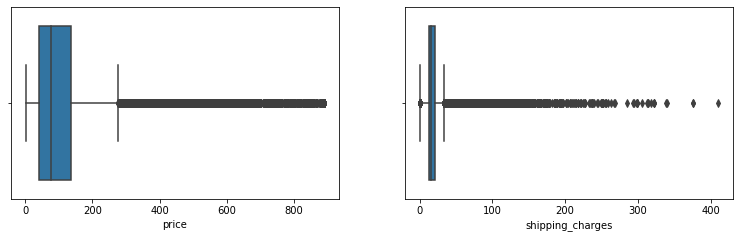

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(data =df2, x=df2.price)
            
plt.subplot(3,3,2)
sns.boxplot(data =df2, x=df2.shipping_charges)


In [14]:
q4 = df2["price"].quantile(0.99)
df2["price"][df2["price"]>= q4] = q4

q3 = df2["shipping_charges"].quantile(0.99)
df2["shipping_charges"][df2["shipping_charges"]>= q4] = q4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


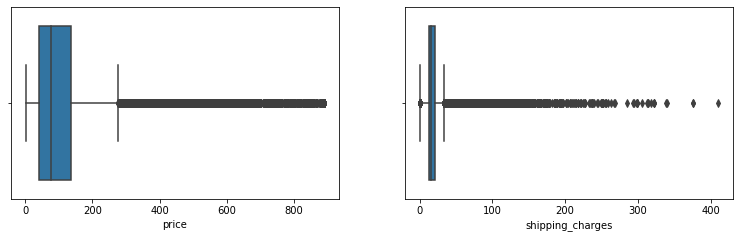

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(data =df2, x=df2.price)
            
plt.subplot(3,3,2)
sns.boxplot(data =df2, x=df2.shipping_charges)

In [16]:
df3 = all_dfs['customers']
df3.head()

,Unnamed: 0,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [17]:
df3.shape

(96352, 5)

In [18]:
df3 = df3.drop_duplicates()

In [19]:
percent = round(df3.isnull().sum() * 100 / len(df3),2)
percent

Unnamed: 0                  0.0
customer_id                 0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [20]:
sum(df3.duplicated()) == 0

True

In [21]:
df4 = all_dfs['payments']
df4.head()

,Unnamed: 0,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [22]:
sum(df4.duplicated()) == 0

True

In [23]:
percent = round(df4.isnull().sum() * 100 / len(df4),2)
percent

Unnamed: 0              0.0
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

In [ ]:
customer_id

In [24]:
df5 = all_dfs['products']
df5.head()

,Unnamed: 0,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225,16,10,14
1,1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000,30,18,20
2,2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154,18,9,15
3,3,cef67bcfe19066a932b7673e239eb23d,baby,371,26,4,26
4,4,9dc1a7de274444849c219cff195d0b71,housewares,625,20,17,13


In [25]:
percent = round(df5.isnull().sum() * 100 / len(df5),2)
percent

Unnamed: 0               0.0
product_id               0.0
product_category_name    0.0
product_weight_g         0.0
product_length_cm        0.0
product_height_cm        0.0
product_width_cm         0.0
dtype: float64

In [26]:
# Verify different categories and their percentages
df5['product_category_name'].value_counts(normalize=True)

toys                                 0.755501
bed_bath_table                       0.023946
sports_leisure                       0.021882
furniture_decor                      0.020850
health_beauty                        0.019667
                                       ...   
diapers_and_hygiene                  0.000030
furniture_mattress_and_upholstery    0.000030
home_comfort_2                       0.000030
security_and_services                0.000030
fashion_childrens_clothes            0.000030
Name: product_category_name, Length: 70, dtype: float64

In [27]:
import numpy as np

df5['product_category_name'] = df5['product_category_name'].replace(np.nan, 'toys')

In [28]:
df5 = df5.dropna()

In [29]:
percent = round(df5.isnull().sum() * 100 / len(df5),2)
percent

Unnamed: 0               0.0
product_id               0.0
product_category_name    0.0
product_weight_g         0.0
product_length_cm        0.0
product_height_cm        0.0
product_width_cm         0.0
dtype: float64

In [30]:
sum(df5.duplicated()) == 0

True

In [31]:
percent = round(df5.isnull().sum() * 100 / len(df5),2)
percent

Unnamed: 0               0.0
product_id               0.0
product_category_name    0.0
product_weight_g         0.0
product_length_cm        0.0
product_height_cm        0.0
product_width_cm         0.0
dtype: float64

In [40]:
mergedData=df1.merge(df2, on='order_id')
mergedData

,Unnamed: 0_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,Unnamed: 0_y,order_item_id,product_id,seller_id,price,shipping_charges
0,0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,100785,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,36896,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,31504,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,65021,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,76043,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110169,99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02,43826,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10
110170,99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27,57884,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02
110171,99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15,7844,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59
110172,99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15,7845,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59


In [41]:
new=mergedData.merge(df3, on='customer_id')
new

,Unnamed: 0_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,Unnamed: 0_y,order_item_id,product_id,seller_id,price,shipping_charges,Unnamed: 0,customer_zip_code_prefix,customer_city,customer_state
0,0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,100785,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,70296,3149,sao paulo,SP
1,62147,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,46456,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,70296,3149,sao paulo,SP
2,1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,36896,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,77027,47813,barreiras,BA
3,2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,31504,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,554,75265,vianopolis,GO
4,3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,65021,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,61081,59296,sao goncalo do amarante,RN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110825,99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02,43826,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10,78424,11722,praia grande,SP
110826,99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27,57884,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02,19901,45920,nova vicosa,BA
110827,99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15,7844,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,16923,28685,japuiba,RJ
110828,99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15,7845,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,16923,28685,japuiba,RJ


In [43]:
new1=new.merge(df4, on='order_id')
new1

,Unnamed: 0_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,Unnamed: 0_y,order_item_id,product_id,seller_id,price,shipping_charges,Unnamed: 0_x,customer_zip_code_prefix,customer_city,customer_state,Unnamed: 0_y,payment_sequential,payment_type,payment_installments,payment_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,100785,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,70296,3149,sao paulo,SP,10770,1,credit_card,1,18.12
1,0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,100785,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,70296,3149,sao paulo,SP,44246,3,voucher,1,2.00
2,0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,100785,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,70296,3149,sao paulo,SP,91130,2,voucher,1,18.59
3,62147,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,46456,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,70296,3149,sao paulo,SP,47016,1,credit_card,1,44.11
4,1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,36896,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,77027,47813,barreiras,BA,7652,1,wallet,1,141.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115708,99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02,43826,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10,78424,11722,praia grande,SP,48750,1,credit_card,3,195.00
115709,99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27,57884,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02,19901,45920,nova vicosa,BA,96280,1,credit_card,5,271.01
115710,99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15,7844,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,16923,28685,japuiba,RJ,1026,1,credit_card,4,441.16
115711,99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15,7845,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59,16923,28685,japuiba,RJ,1026,1,credit_card,4,441.16


In [50]:
new1.to_excel("out.xlsx")  

In [44]:
new2=new1.merge(df5, on='product_id')
new2

,Unnamed: 0_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,Unnamed: 0_y,order_item_id,product_id,seller_id,price,shipping_charges,Unnamed: 0_x,customer_zip_code_prefix,customer_city,customer_state,Unnamed: 0_y,payment_sequential,payment_type,payment_installments,payment_value,Unnamed: 0,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,100785,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,70296,3149,sao paulo,SP,10770,1,credit_card,1,18.12,2349,housewares,500,19,8,13
1,0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,100785,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,70296,3149,sao paulo,SP,44246,3,voucher,1,2.00,2349,housewares,500,19,8,13
2,0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,100785,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,70296,3149,sao paulo,SP,91130,2,voucher,1,18.59,2349,housewares,500,19,8,13
3,25715,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,8165,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,45300,3366,sao paulo,SP,45269,1,credit_card,3,37.77,2349,housewares,500,19,8,13
4,26730,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,6384,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,57439,2290,sao paulo,SP,94871,1,credit_card,1,37.77,2349,housewares,500,19,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115688,99414,e8fd20068b9f7e6ec07068bb7537f781,fb9310710003399b031add3e55f34719,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-23 15:36:29,2017-08-31,102595,1,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,356.00,18.12,84805,3318,sao paulo,SP,93831,1,credit_card,10,748.24,21019,toys,2800,28,23,23
115689,99414,e8fd20068b9f7e6ec07068bb7537f781,fb9310710003399b031add3e55f34719,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-23 15:36:29,2017-08-31,102596,2,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,356.00,18.12,84805,3318,sao paulo,SP,93831,1,credit_card,10,748.24,21019,toys,2800,28,23,23
115690,99432,cfa78b997e329a5295b4ee6972c02979,a49e8e11e850592fe685ae3c64b40eca,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2018-01-26 15:45:14,2018-01-18,91526,1,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,55.90,15.14,43959,83870,campo do tenente,PR,54697,1,credit_card,1,71.04,20771,toys,300,16,6,12
115691,99436,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,68415,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,72.00,13.08,60577,12209,sao jose dos campos,SP,50534,1,credit_card,3,85.08,18468,toys,1175,22,13,18


In [46]:
from functools import reduce

# compile the list of dataframes you want to merge
data_frames = [df1, df2, df4]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['order_id'],
                                            how='outer'), data_frames)


In [49]:
from functools import reduce
import pandas as pd

dfs = [df1, df2, df3,df4,df5]
nan_value = 0

# # solution 1 (fast)
# result_1 = pd.concat(dfs, join='outer', axis=1).fillna(nan_value)
# result_1

# # solution 2
result_2 = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                              left_index=True, right_index=True, 
                                              how='outer'), 
                  dfs).fillna(nan_value)
result_2

,Unnamed: 0_x,order_id_x,customer_id_x,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,Unnamed: 0_y,order_id_y,order_item_id,product_id_x,seller_id,price,shipping_charges,Unnamed: 0_x,customer_id_y,customer_zip_code_prefix,customer_city,customer_state,Unnamed: 0_y,order_id,payment_sequential,payment_type,payment_installments,payment_value,Unnamed: 0,product_id_y,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0.0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,0.0,861eff4711a542e4b93843c6dd7febb0,14409.0,franca,SP,0.0,b81ef226f3fe1789b1e8b2acac839d17,1.0,credit_card,8.0,99.33,0.0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,1.0,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,1.0,290c77bc529b7ac935b93aa66c333dc3,9790.0,sao bernardo do campo,SP,1.0,a9810da82917af2d9aefd1278f1dcfa0,1.0,credit_card,1.0,24.39,1.0,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,2.0,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,2.0,060e732b5b29e8181a18229c7b0b2b5e,1151.0,sao paulo,SP,2.0,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,credit_card,1.0,65.71,2.0,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,3.0,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15 00:00:00,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,3.0,259dac757896d24d7702b9acbbff3f3c,8775.0,mogi das cruzes,SP,3.0,ba78997921bbcdc1373bb41e913ab953,1.0,credit_card,8.0,107.78,3.0,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,4.0,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26 00:00:00,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,4.0,345ecd01c38d18a9036ed96c73b8d066,13056.0,campinas,SP,4.0,42fdf880ba16b47b59251dd489d4441a,1.0,credit_card,2.0,128.45,4.0,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,0.0,0,0,0,0,0,0,0,112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.00,0.0,0,0,0.0,0.0,0.0,0.0
112646,0.0,0,0,0,0,0,0,0,112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.00,0.0,0,0,0.0,0.0,0.0,0.0
112647,0.0,0,0,0,0,0,0,0,112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.00,0.0,0,0,0.0,0.0,0.0,0.0
112648,0.0,0,0,0,0,0,0,0,112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,0.0,0,0.0,0,0,0.0,0,0.0,0,0.0,0.00,0.0,0,0,0.0,0.0,0.0,0.0


In [51]:
pip l XinstallsxWriter

     |████████████████████████████████| 153kB 5.8MB/s 


In [52]:
import xlsxwriter
writer = pd.ExcelWriter('market_data_output.xlsx', engine='xlsxwriter')
df1.to_excel(writer, sheet_name='orders')
df2.to_excel(writer, sheet_name='order_items')
df3.to_excel(writer, sheet_name='customers')
df4.to_excel(writer, sheet_name='payments')
df5.to_excel(writer, sheet_name='products')
writer.save()